In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# **Task 1 : Data Cleaning and Preparation**

**a)  Load the dataset into a DataFrame or equivalent data structure.**

In [86]:
df=pd.read_csv("/content/Cardiotocographic.csv")
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

**b) 	Handle missing values appropriately (e.g., imputation, deletion).**

In [87]:
print("Missing Values before imputation\n")
df.isnull().sum()

Missing Values before imputation



LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [88]:
df.fillna(df.mean(), inplace=True)
print("Missing Values after imputation\n")
df.isnull().sum()

Missing Values after imputation



LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

**c) 	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).**

In [89]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [90]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

**d) 	Detect and treat outliers if necessary.**

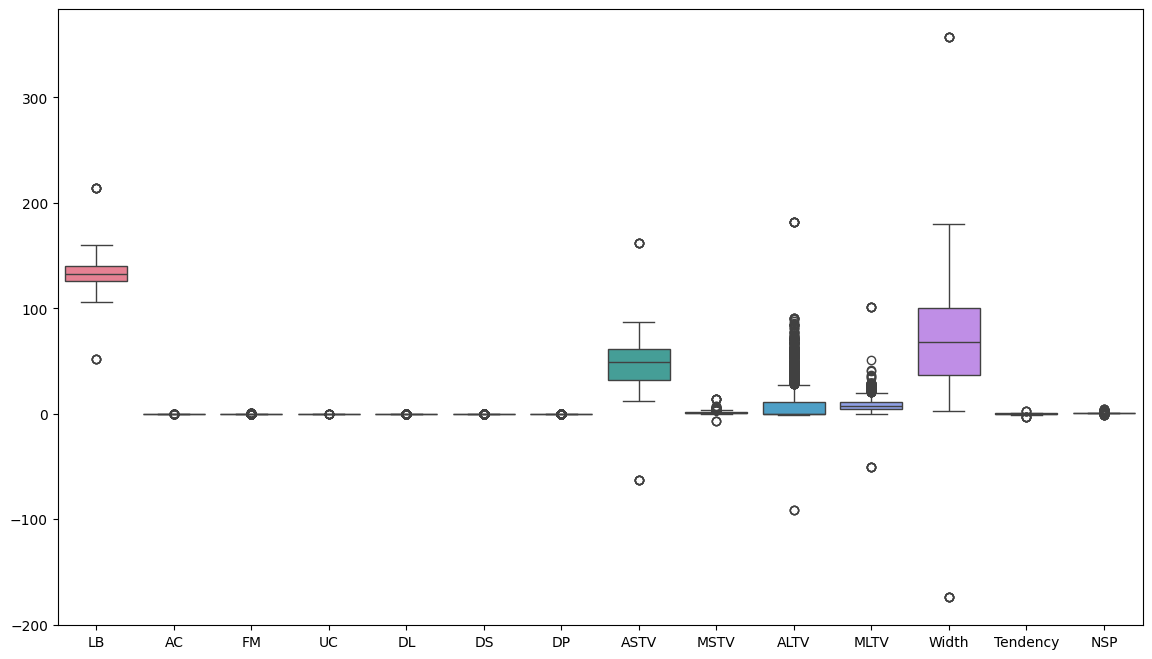

In [91]:
# Boxplot to detect outlier
figure=plt.figure(figsize=(14,8))
sns.boxplot(data=df)
plt.show()

In [92]:
# Outlier Treatment using IQR Method
for col in df.columns:
  if df[col].dtype != 'object':
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
print("Outlier Treated")

Outlier Treated


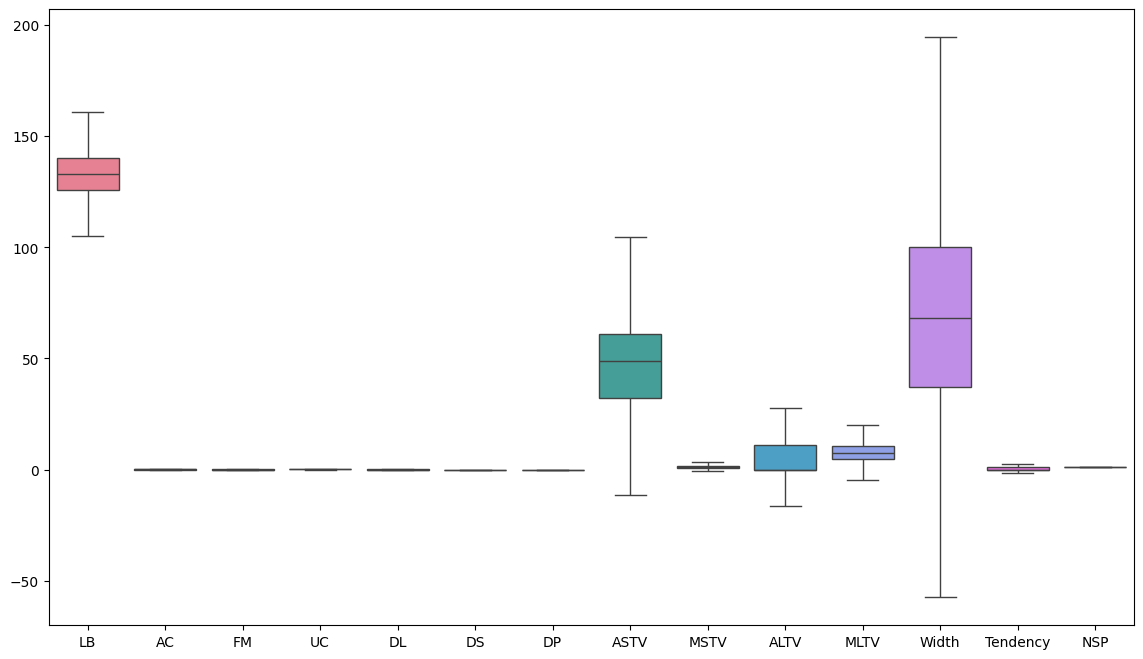

In [93]:
# After Outlier treated Boxplot
figure=plt.figure(figsize=(14,8))
sns.boxplot(data=df)
plt.show()

In [94]:
df.shape

(2126, 14)

# **Task 2 : Statistical Summary**

**a)  Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).**

In [95]:
df.describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.293725     0.003147     0.001568     0.004362     0.001770   
std       9.930227     0.003826     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.016212   
std       0.0     0.0    17.612745     0.781091    10.378400     5.046784   
min       0.0     0.0   -11.500000    -0.800000   -16.500000    -4.700000   
25%       0.0     0.0    32.000000     0.700000     0.000000     4.600000   
50%       0.0     0.0    49.000000     1.200000     0.000000     7.500000   
75%       0.0     0.0    61.000000     1.700000    11.000000    10.800000   
max       0.0     0.0   104.500000     3.200000    27.500000    20.100000   

             Width     Tendency     NSP  
count  2126.000000  2126.000000  2126.0  
mean     70.321076     0.319662     1.0  
std      39.570633     0.621602     0.0  
min     -57.500000    -1.500000     1.0  
25%      37.000000     0.000000     1.0  
50%      68.000000     0.000000     1.0  
75%     100.000000     1.000000     1.0  
max     194.500000     2.500000     1.0

**b) 	Highlight any interesting findings from this summary.**

Here are some interesting findings from the statistical summary:

**1) Mean vs. Median** : For most variables, the mean and median are relatively close, suggesting a somewhat symmetrical distribution. However, for some variables like ASTV, ALTV, and Width, there are noticeable differences between the mean and median, which could indicate some skewness in the data.

**2) Range of Values**: The range of values varies significantly across different variables. For example, LB has a relatively narrow range compared to Width.

**3) Standard Deviation**: The standard deviation also varies, indicating different levels of dispersion around the mean for each variable. Variables like Width have a higher standard deviation, suggesting more variability in the data.

**4) DS and DP**: The mean, min, 25%, 50%, 75%, and max values for DS and DP are all 0.0. This indicates that these columns contain mostly or entirely zero values after outlier treatment, which might be an interesting observation depending on the context of the data.

# **Task 3 : Data Visualization**

**a) 	Create histograms or boxplots to visualize the distributions of various numerical variables.**

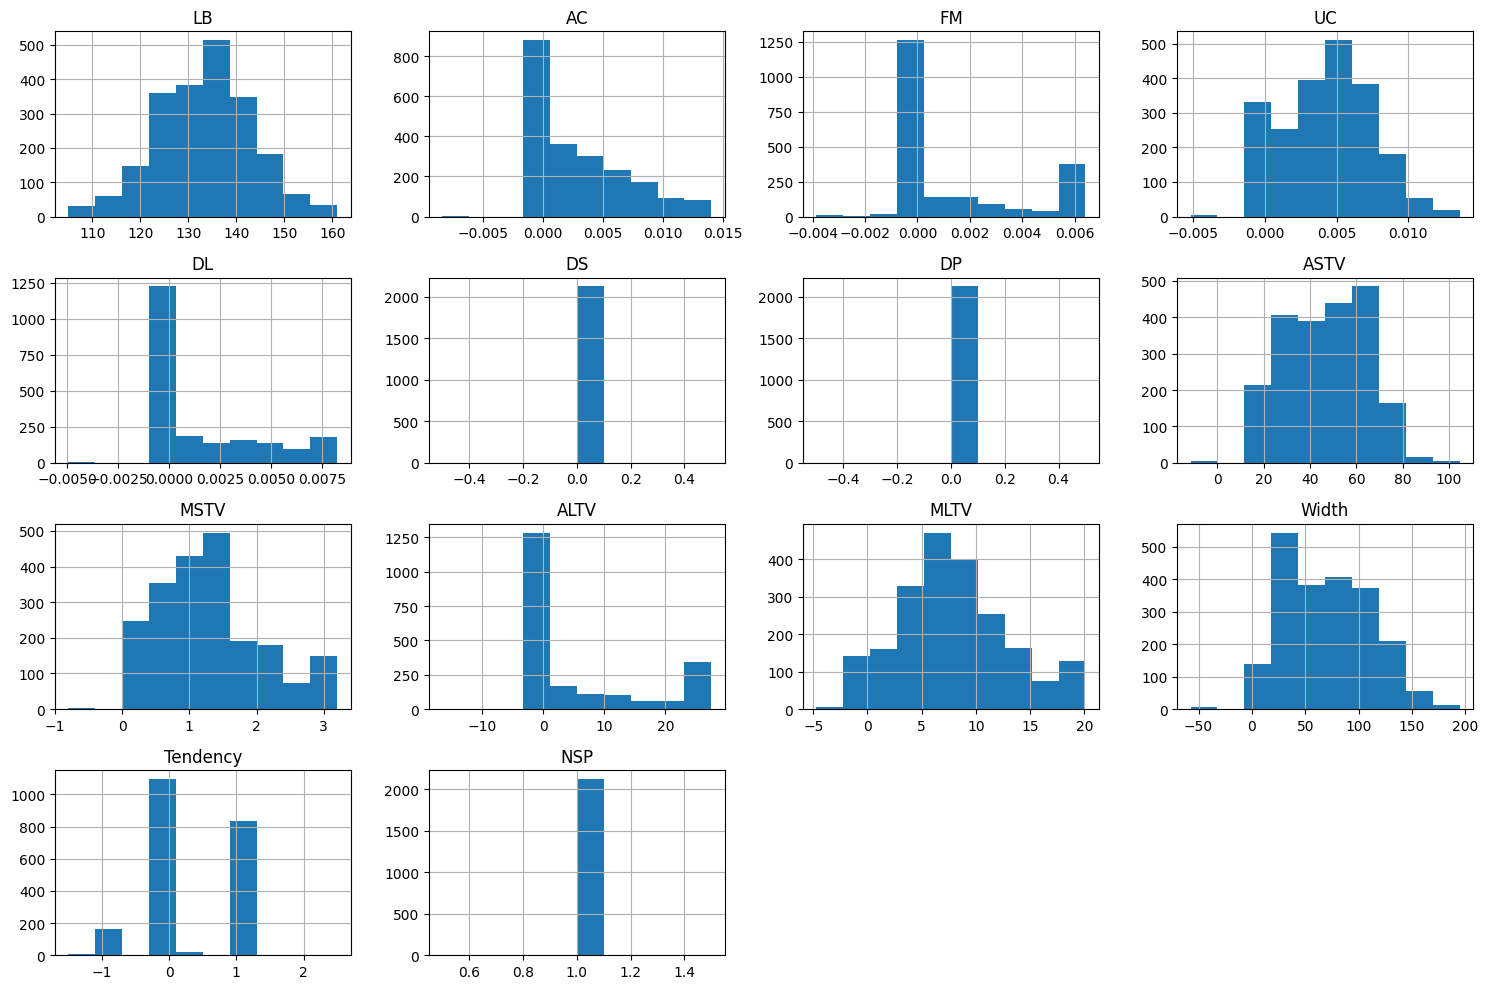

In [96]:
# Histogram of numerical variables
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

**b) 	Use bar charts or pie charts to display the frequency of categories for categorical variables.**

Unique values in NSP column:
[1.]


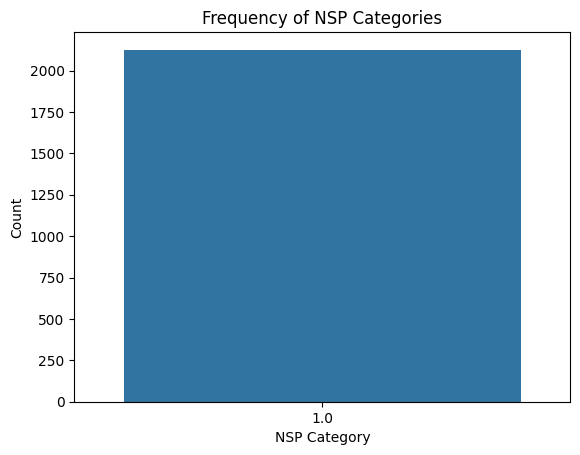

In [97]:
# Check unique values in NSP to confirm if it can be treated as categorical
print("Unique values in NSP column:")
print(df['NSP'].unique())

# Create a bar chart for the 'NSP' column
sns.countplot(x='NSP', data=df)
plt.title('Frequency of NSP Categories')
plt.xlabel('NSP Category')
plt.ylabel('Count')
plt.show()

**c) 	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.**

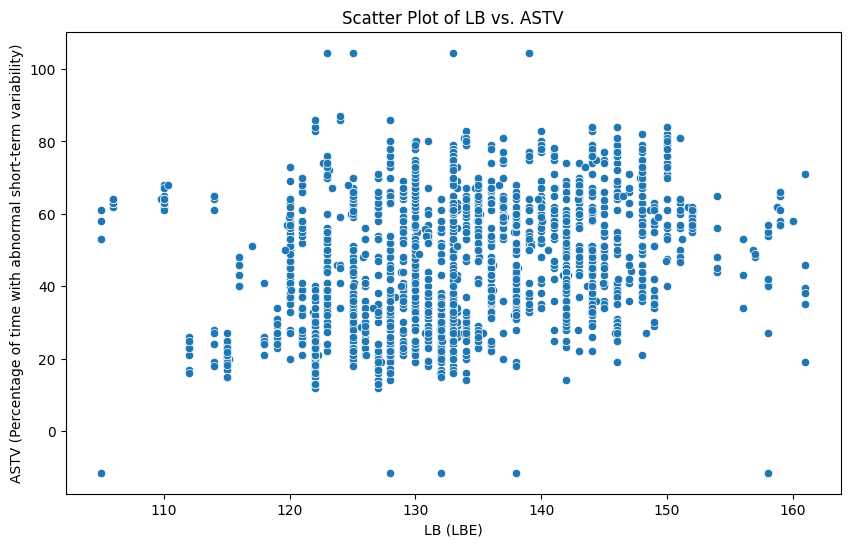

In [98]:
# Scatter Plot of LB vs ASTV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='ASTV', data=df)
plt.title('Scatter Plot of LB vs. ASTV')
plt.xlabel('LB (LBE)')
plt.ylabel('ASTV (Percentage of time with abnormal short-term variability)')
plt.show()

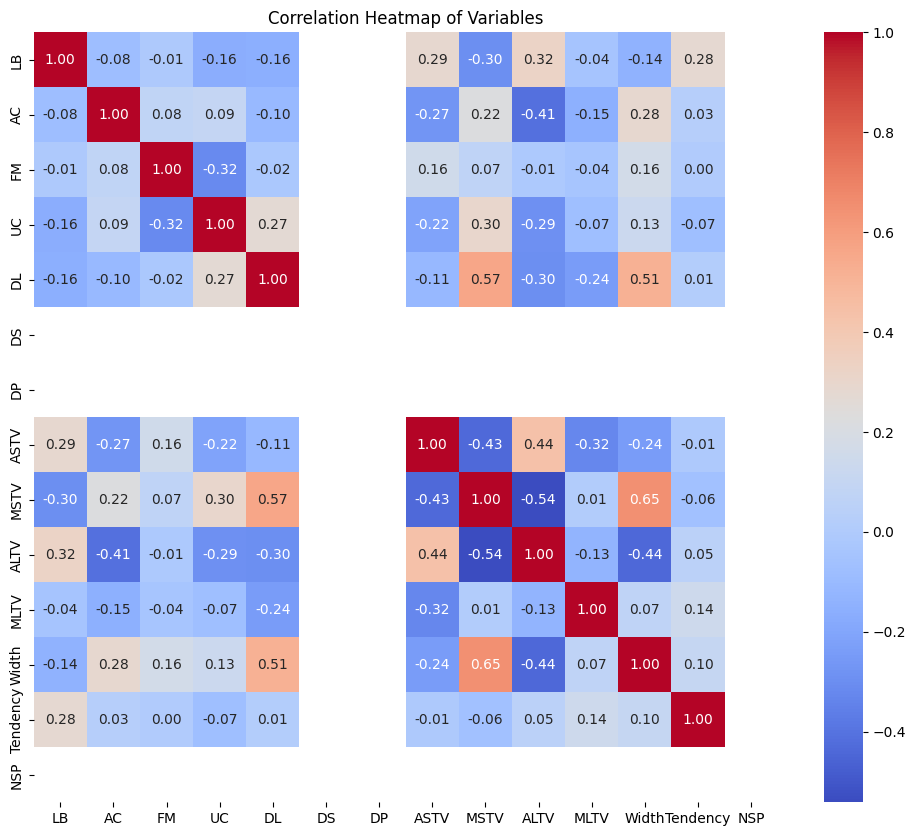

In [99]:
# Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

**d) 	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.**

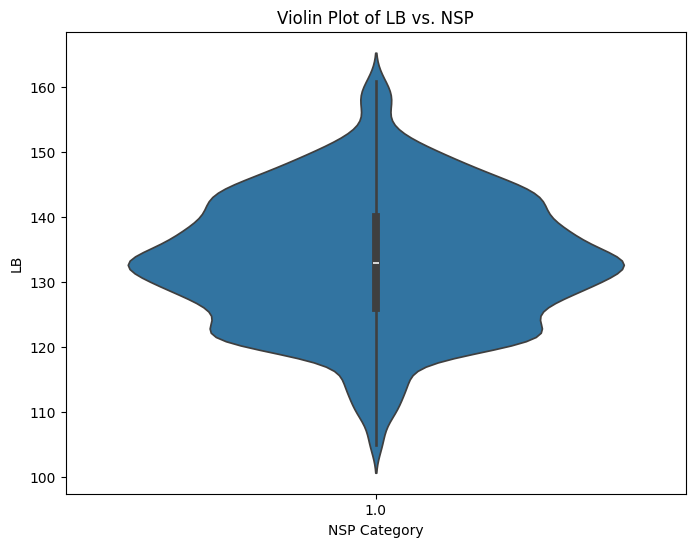

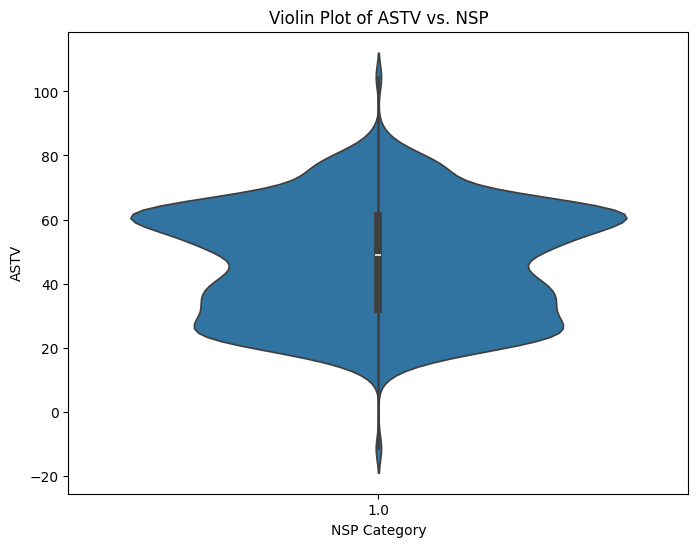

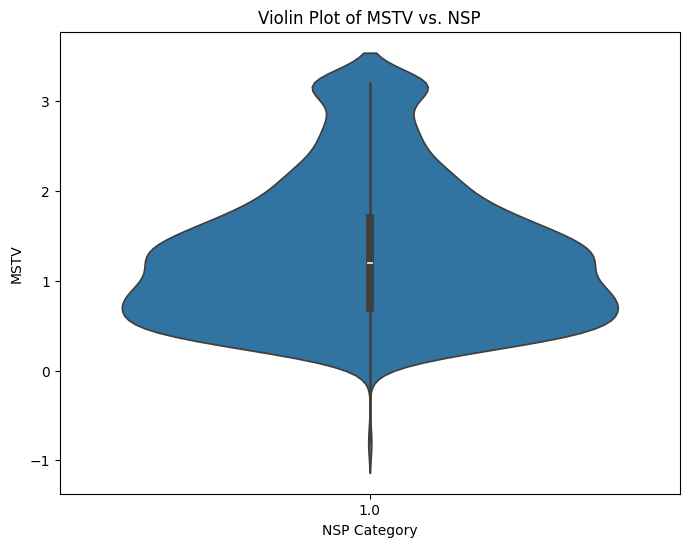

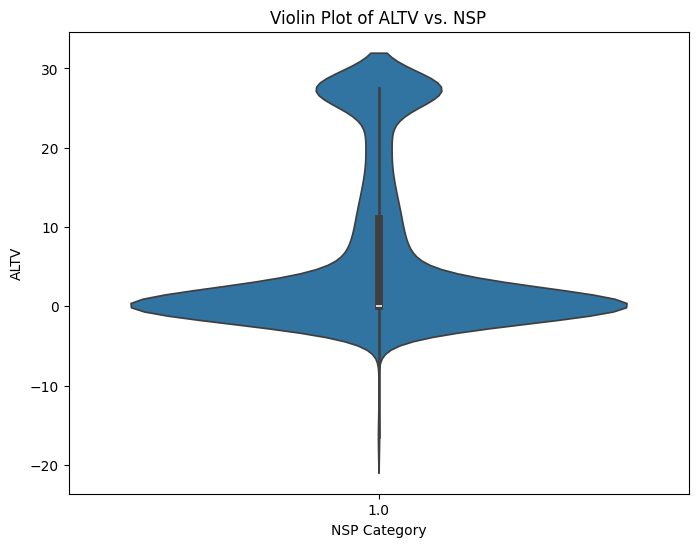

In [100]:
# Select a few important numerical columns to visualize with violin plots
numerical_cols = ['LB', 'ASTV', 'MSTV', 'ALTV']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='NSP', y=col, data=df)
    plt.title(f'Violin Plot of {col} vs. NSP')
    plt.xlabel('NSP Category')
    plt.ylabel(col)
    plt.show()

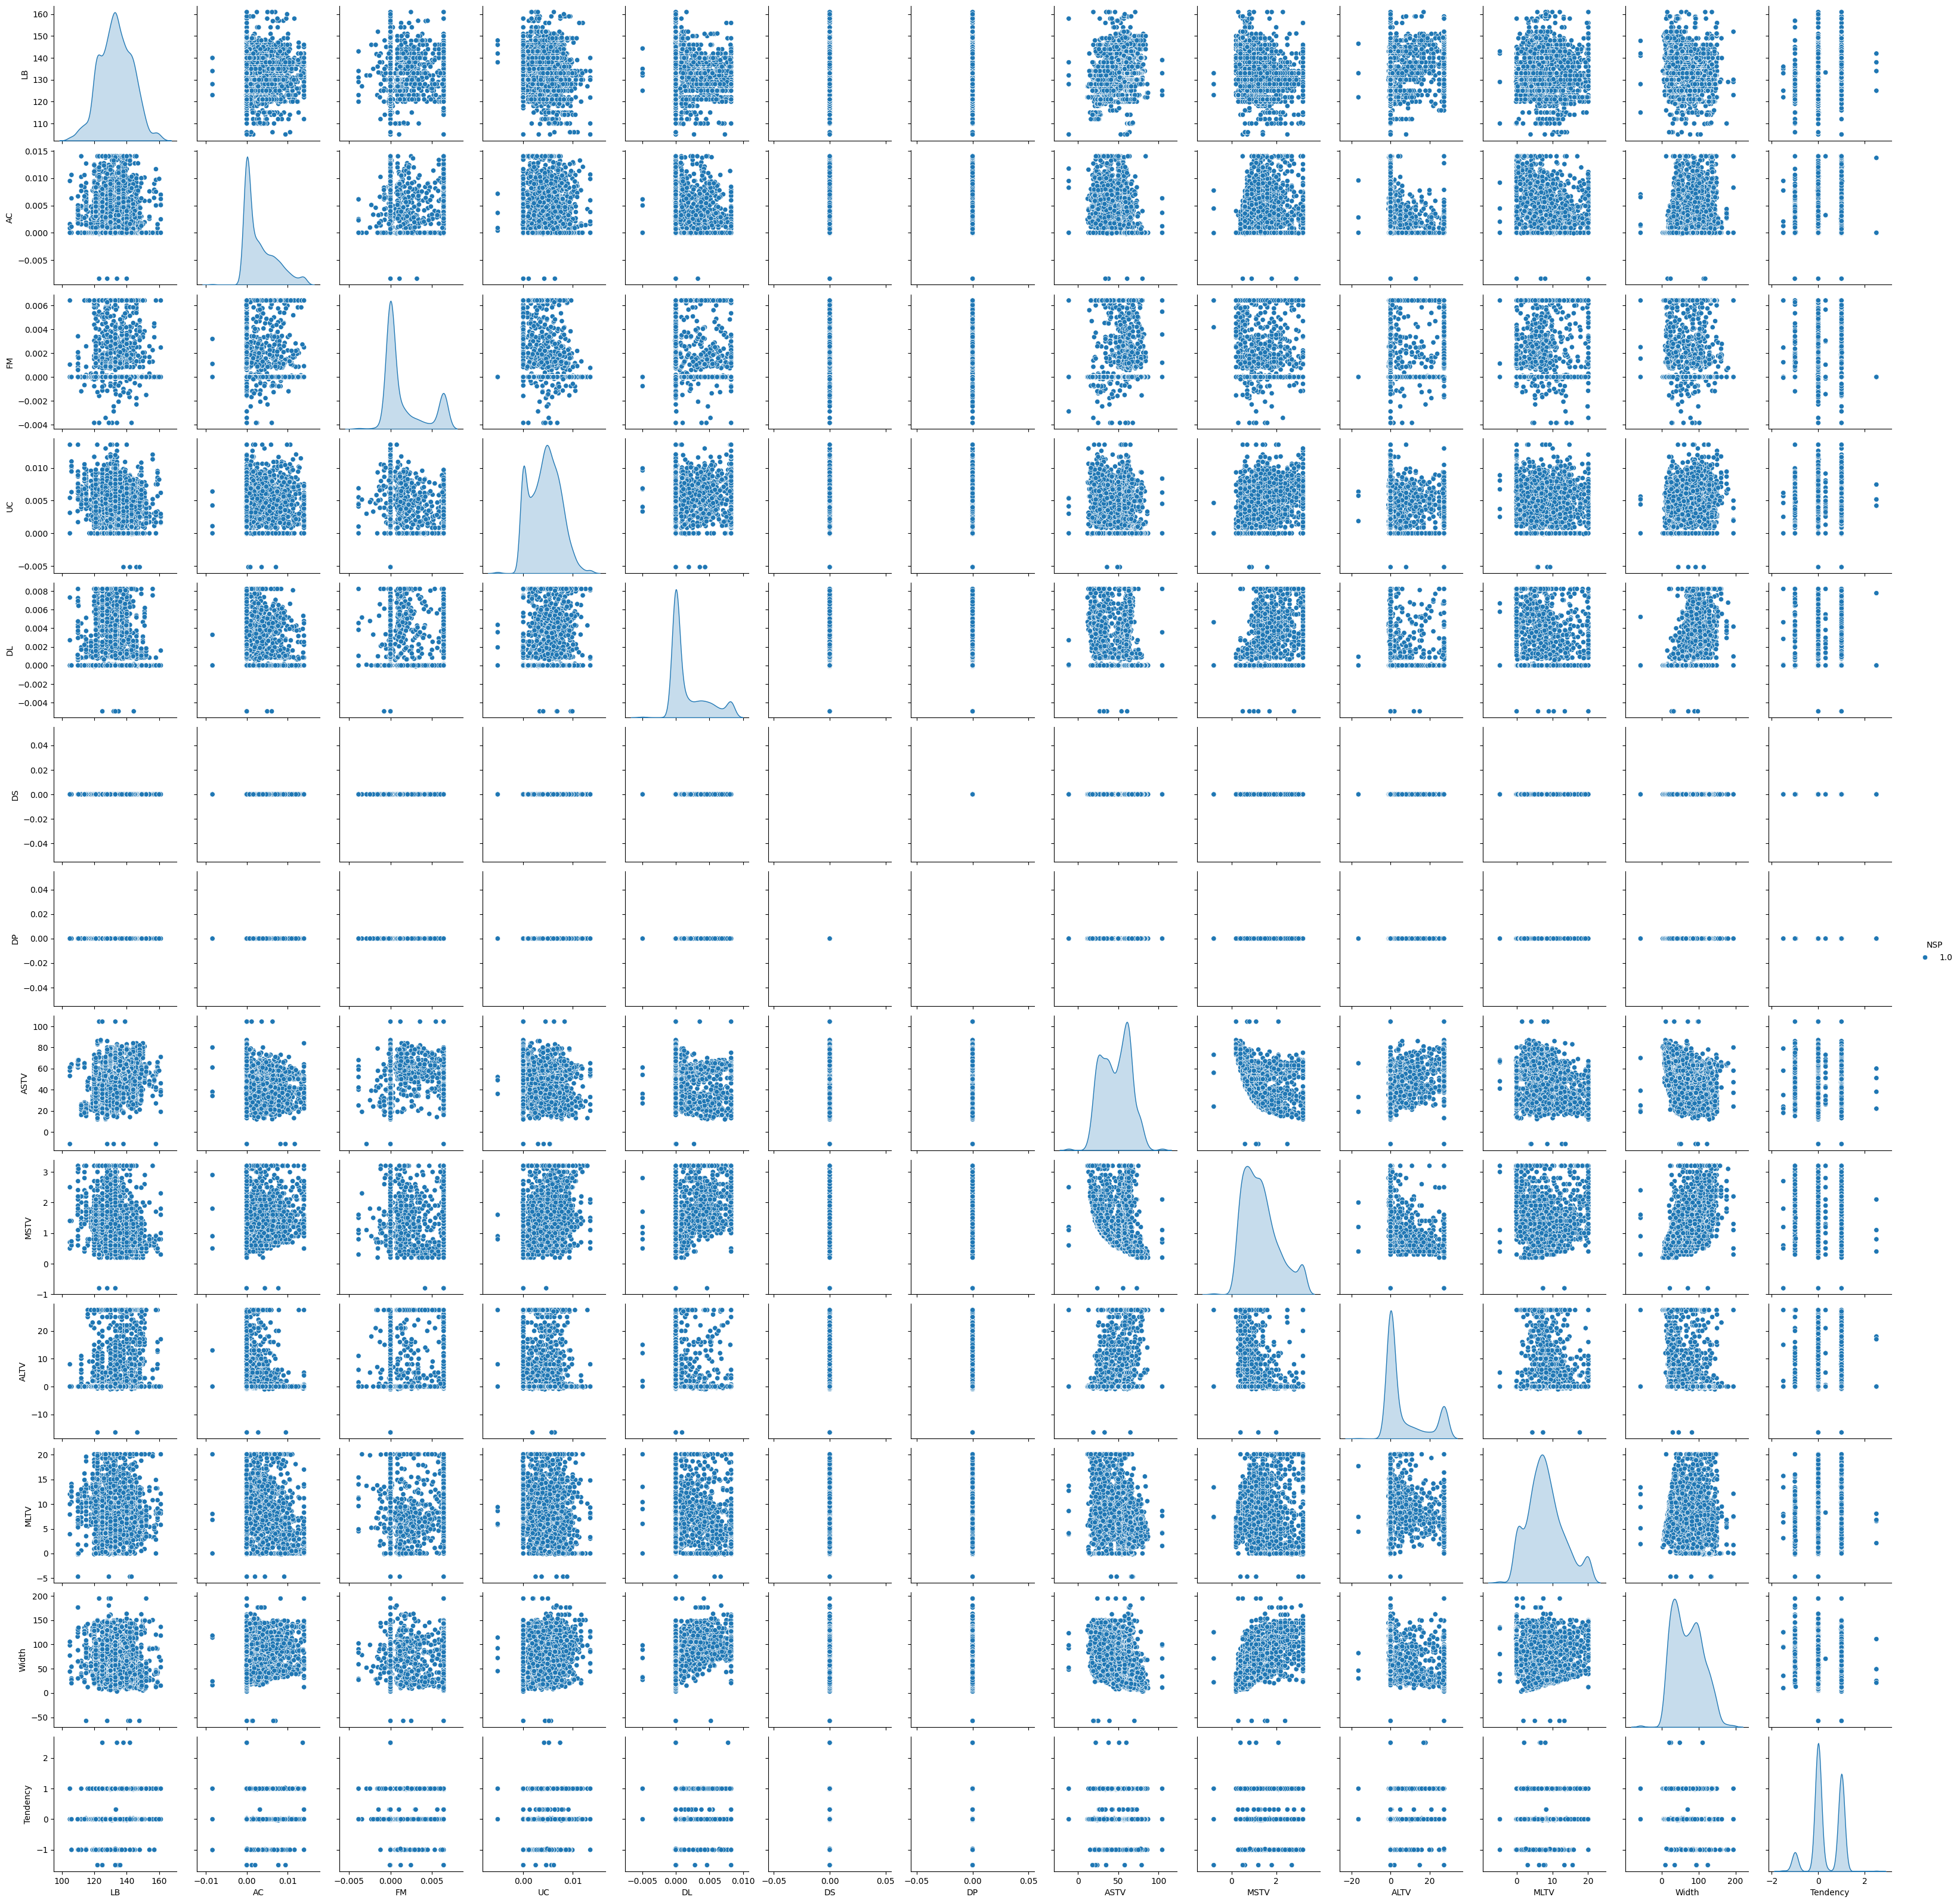

In [101]:
# Pairplot
sns.pairplot(df, hue='NSP')
plt.show()

# **Task 4 : Pattern Recognition and Insights**

**a)	Identify any correlations between variables and discuss their potential implications.**

Based on the correlation heatmap, here are some notable correlations between variables and their potential implications:

**Positive Correlations**:

1) MSTV and Width: There appears to be a strong positive correlation between Mean Short-Term Variability (MSTV) and Width. This suggests that as the variability in short-term fetal heart rate increases, the width of the heart rate trace also tends to increase.
2) DL and Width: There is a positive correlation between DL (Prolonged Decelerations) and Width. This might indicate that when prolonged decelerations are present, the overall variability of the heart rate trace, as measured by width, is affected.
3) ASTV and ALTV: There is a positive correlation between ASTV (Percentage of time with abnormal short-term variability) and ALTV (Percentage of time with abnormal long-term variability). This is expected, as both relate to the variability of the fetal heart rate.


**Negative Correlations:**

1) AC and ALTV: There is a negative correlation between AC (Accelerations) and ALTV (Percentage of time with abnormal long-term variability). This suggests that as the number of accelerations increases, the percentage of time with abnormal long-term variability tends to decrease. This aligns with the understanding that accelerations are generally a sign of fetal well-being.
2) LB and AC: There is a slight negative correlation between LB (LBE) and AC (Accelerations). This might imply that a higher baseline fetal heart rate is associated with fewer accelerations.


**Potential Implications:**

These correlations can provide insights into the relationships between different cardiotocographic measurements. For example, the strong positive correlation between MSTV and Width suggests they might be capturing similar aspects of fetal heart rate variability. The negative correlation between AC and ALTV highlights the importance of accelerations as an indicator of fetal health.

It's important to note that correlation does not imply causation. These findings suggest potential relationships that warrant further investigation and clinical interpretation.

**b) 	Look for trends or patterns over time if temporal data is available.**

In [102]:
# Based on the available data, there is no temporal information (e.g., a date or time column).
# Therefore, it is not possible to analyze trends or patterns over time.

# **Task 5 : Conclusion**

**a) 	Summarize the key insights and patterns discovered through your exploratory analysis.**

Based on the exploratory data analysis:

**1) Data Cleaning and Preparation**: Missing values were identified and imputed using the mean of each column. Outliers were detected and treated using the IQR method, as visualized by the boxplots before and after treatment. Data types were confirmed to be appropriate (float64 for all variables).

**2) Statistical Summary**: The statistical summary provided insights into the central tendency, dispersion, and range of each variable. Differences between the mean and median for some variables suggested potential skewness. The observation of mostly zero values in the 'DS' and 'DP' columns was noted.

**3) Data Visualization**: Histograms and boxplots illustrated the distributions of the numerical variables. The bar and pie charts showed the frequency distribution of the 'NSP' variable. Scatter plots and the correlation heatmap revealed relationships between pairs of variables, highlighting positive correlations (e.g., MSTV and Width, DL and Width, ASTV and ALTV) and negative correlations (e.g., AC and ALTV, LB and AC). Violin plots provided a deeper look into the distribution of selected numerical variables across the 'NSP' category.

**4) Temporal Analysis**: Due to the absence of temporal data in the dataset, analysis of trends or patterns over time was not possible.


Overall, the exploratory analysis provided a good understanding of the dataset's characteristics, including the distribution of variables, the presence of missing values and outliers, and the relationships between different cardiotocographic measurements. These insights are valuable for further analysis and modeling.

**b) 	Discuss how these findings could impact decision-making or further analyses.**

The findings from this exploratory data analysis can significantly impact decision-making and further analyses in several ways:

**1) Data Quality**: Understanding the presence and handling of missing values and outliers is crucial for ensuring data quality. Decisions on imputation or removal of data can affect the results of any subsequent modeling.

**2) Feature Selection**: The statistical summary and correlation analysis can help in identifying relevant features for predictive modeling. Variables with low variance or high correlation with other features might be considered for removal or transformation. The observation of mostly zero values in 'DS' and 'DP' might lead to a decision to exclude these features or investigate them further.

**3) Model Selection**: The distributions of variables (seen in histograms and boxplots) and the relationships between them (seen in scatter plots and heatmaps) can inform the choice of appropriate machine learning models. Some models perform better with normally distributed data or require handling of multicollinearity.

**4) Interpretation of Results**: The correlations identified provide valuable context for interpreting the results of any predictive model. For example, if a model identifies 'MSTV' and 'Width' as important predictors, their strong positive correlation should be considered when analyzing their impact. The negative correlation between 'AC' and 'ALTV' reinforces the clinical significance of these variables.

**5) Further Investigation**: The exploratory analysis might highlight areas that require further investigation. For instance, the skewness in certain variables might necessitate data transformations. The lack of temporal data indicates that time-series analysis is not possible with this dataset, guiding the direction of future analyses.

Overall, the insights gained from this initial exploration provide a solid foundation for building robust models and making informed decisions based on the data.